<a href="https://colab.research.google.com/github/nandu26m/data-analytics-projects/blob/main/airlines-data-analysis-project/Airline_Flight_Price_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0: Install XGBoost

In [1]:
!pip install xgboost

## Part 1: Import Libraries & Load Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("airlines_flights_data.csv")
data.dropna(inplace=True)
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

## Part 2: Preprocessing

In [3]:
# Encode categorical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class', 'flight']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # save for later use

# Features and target
X = data.drop(columns=['price', 'index'])
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test Shapes:", X_train.shape, X_test.shape)

Train/Test Shapes: (92209, 10) (23053, 10)


## Part 3: Train XGBoost Regressor

In [4]:
# Initialize model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

In [5]:
print("XGBoost Regressor Metrics:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

XGBoost Regressor Metrics:
MAE: 861.9648098342254
RMSE: 1524.0004898854731
R2 Score: 0.8236828159259572


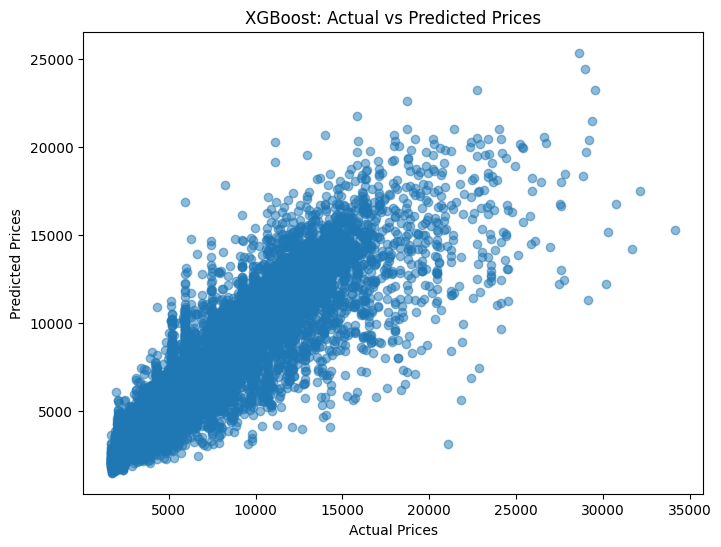

In [6]:
# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost: Actual vs Predicted Prices")
plt.show()

## Part 4: Feature Importance & New Predictions

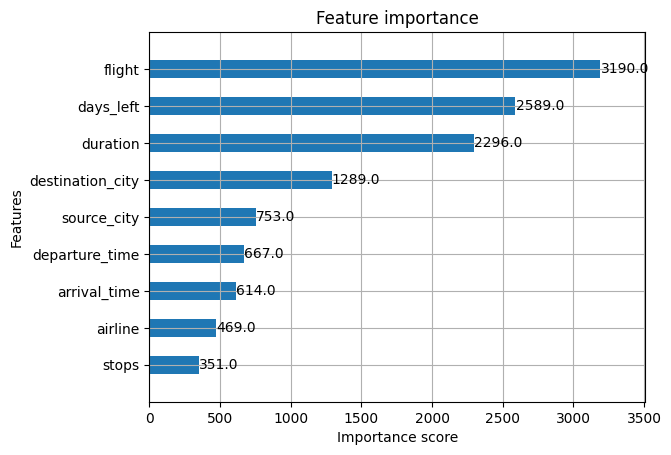

Predicted Price with XGBoost: 10812.49


In [7]:
# Feature importance
xgb.plot_importance(xgb_model, height=0.5)
plt.show()

# Predict a new flight
new_data = pd.DataFrame({
    'airline': [4],
    'flight': [1408],
    'source_city': [2],
    'departure_time': [2],
    'stops': [2],
    'arrival_time': [5],
    'destination_city': [5],
    'class': [1],
    'duration': [2.17],
    'days_left': [1]
})

predicted_price = xgb_model.predict(new_data)
print("Predicted Price with XGBoost:", predicted_price[0])